In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import time
import random
import operator
import pickle
from copy import deepcopy

In [2]:
df = pd.read_csv('flightlist-november.csv') 

print(df)

        callsign number  icao24 registration typecode origin destination  \
0        TUP6928    NaN  424450          NaN      NaN    NaN        UUWW   
1         CSN399  CZ399  781795          NaN      NaN   YMML        KJFK   
2         ETH714    NaN  040101       ET-ASG     B788   KEWR        ESSA   
3          ZSALT    NaN  008142       ZS-ALT     B190    NaN        YPPH   
4         IRM112  W5112  7335a1       EP-MMA     A343   WMKK        LTBW   
...          ...    ...     ...          ...      ...    ...         ...   
1825010   NKS236  NK236  ac97e1       N910NK      NaN    NaN        KFLL   
1825011    AM333    NaN  7c6a57       VH-VAH     BE20   YMAV        YMEN   
1825012   N404AM    NaN  a4bb89       N404AM     B407    NaN        1IL4   
1825013   N383AK    NaN  a46679       N383AK      NaN   PAMR        PAMR   
1825014   EJA426  1I426  a51358       N426QS     GLF4   KALN        KSUS   

                         firstseen                   lastseen  \
0        2020-10-31 01

In [3]:
dfs = df

In [4]:
dfs = dfs.drop(['number', 'icao24', 'altitude_1', 'altitude_2'], axis=1)

In [5]:
dfs = dfs.dropna(subset=['registration', 'typecode', 'origin', 'destination', 'latitude_2', 'longitude_2'])

In [6]:
dfs = dfs[dfs["callsign"].str[:3]=="SIA"]

In [7]:
dfs.head()

,callsign,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,latitude_2,longitude_2
34,SIA377,9V-SMG,A359,LIMC,WSSS,2020-10-31 12:31:55+00:00,2020-11-01 00:48:28+00:00,2020-11-01 00:00:00+00:00,45.623749,8.735337,1.308929,103.960644
161,SIA26,9V-SMI,A359,WSSS,EDDF,2020-10-31 16:12:38+00:00,2020-11-01 04:36:47+00:00,2020-11-01 00:00:00+00:00,1.395721,103.997048,50.040572,8.549163
167,SIA324,9V-SMT,A359,WSSS,EHAM,2020-10-31 16:16:27+00:00,2020-11-01 04:55:17+00:00,2020-11-01 00:00:00+00:00,1.389542,103.994720,52.357628,4.711487
171,SIA283,9V-SMD,A359,WSSS,NZAA,2020-10-31 16:18:49+00:00,2020-11-01 01:19:01+00:00,2020-11-01 00:00:00+00:00,1.394240,103.996298,-36.991241,174.861496
267,SIA346,9V-SMH,A359,WSSS,LSZH,2020-10-31 17:42:04+00:00,2020-11-01 06:16:57+00:00,2020-11-01 00:00:00+00:00,1.392471,103.996251,47.478653,8.540771


In [8]:
dfs.registration.unique()
# dfs.origin.unique()

array(['9V-SMG', '9V-SMI', '9V-SMT', '9V-SMD', '9V-SMH', '9V-SFN',
       '9V-SMC', '9V-SFM', '9V-SMS', '9V-SFK', '9V-SML', '9V-SWQ',
       '9V-MGL', '9V-SMF', '9V-SFQ', '9V-SWE', '9V-SFI', '9V-SMO',
       '9V-SFP', '9V-SFO', '9V-SMQ', '9V-SMN', '9V-SMJ', '9V-SMM',
       '9V-SMB', '9V-SMP', '9V-SMA', '9V-SWY', '9V-SWR', '9V-SCB',
       '9V-SWP', '9V-SMK', '9V-MGI', '9V-SMR', '9V-SWM', '9V-SWH',
       '9V-SWO', '9V-MGF', '9V-SWS', '9V-SKU', '9V-SME', '9V-SWK',
       '9V-SWN'], dtype=object)

In [9]:
data = {'airport': [],
        'latitude': [],
        'longitude': []}

airports = pd.DataFrame(data)
print(airports)

Empty DataFrame
Columns: [airport, latitude, longitude]
Index: []


In [10]:
airports_data = dfs.origin.unique()
airports_another_data = dfs.destination.unique()

for i in airports_another_data:
    found = False
    for j in airports_data:
        if i == j:
            found = True
    if found == False:
        airports_data = np.append(airports_data, i)

In [11]:
print(airports_data)

['LIMC' 'WSSS' 'OMSJ' 'EGLL' 'YSSY' 'YMML' 'NZAA' 'KORD' 'WBSB' 'VOMM'
 'KDFW' 'EHAM' 'VHHH' 'EDDF' 'FAOR' 'YBBN' 'PANC' 'EBMB' 'WMKK' 'KLAX'
 'LSZH' 'NZCH' 'VOBL' 'ZUCK' 'VABB' 'LFPG' 'EKCH' 'VIDP' 'FARA' 'EBBR'
 'YPPH' 'LEBL' 'WSAC' 'VGZR' 'YSCB' 'RJAK' 'FAGM' 'LTBW' 'YTWB' 'YRED'
 'TS53' 'YPWH' 'RJAA' 'LTBA' 'FABB' 'VGTJ' '6AK5' 'WIDD']


In [12]:
for i in airports_data:
    if (np.isnan(dfs[dfs["origin"]==i]["latitude_1"].median())):
        latitude = dfs[dfs["destination"]==i]["latitude_2"].median()
        longitude = dfs[dfs["destination"]==i]["longitude_2"].median()
        
    elif (np.isnan(dfs[dfs["destination"]==i]["latitude_2"].median())):
        latitude = dfs[dfs["origin"]==i]["latitude_1"].median()
        longitude = dfs[dfs["origin"]==i]["longitude_1"].median()
        
    else:
        latitude = (dfs[dfs["origin"]==i]["latitude_1"].median() + dfs[dfs["destination"]==i]["latitude_2"].median())/2
        longitude = (dfs[dfs["origin"]==i]["longitude_1"].median() + dfs[dfs["destination"]==i]["longitude_2"].median())/2
        
    airport = {'airport': i, 'latitude': latitude, 'longitude': longitude}
    airports = airports.append(airport, ignore_index=True)

print(airports)

   airport   latitude   longitude
0     LIMC  45.622997    8.729880
1     WSSS   1.349354  103.991831
2     OMSJ  25.333187   55.513881
3     EGLL  51.464928   -0.451351
4     YSSY -33.937398  151.173686
5     YMML -37.659397  144.836085
6     NZAA -37.007307  174.802684
7     KORD  41.967407  -87.905482
8     WBSB   4.943314  114.927863
9     VOMM  12.988395   80.164536
10    KDFW  32.904827  -97.050797
11    EHAM  52.329506    4.733640
12    VHHH  22.306459  113.907723
13    EDDF  50.045047    8.569396
14    FAOR -26.110302   28.248013
15    YBBN -27.383320  153.122108
16    PANC  61.179126 -150.017751
17    EBMB  50.909637    4.492666
18    WMKK   2.714566  101.717297
19    KLAX  33.936884 -118.397799
20    LSZH  47.467043    8.551562
21    NZCH -43.486825  172.534596
22    VOBL  13.189594   77.703107
23    ZUCK  29.778076  106.693145
24    VABB  19.088734   72.868544
25    LFPG  48.996591    2.563600
26    EKCH  55.612789   12.641687
27    VIDP  28.559853   77.113512
28    FARA -26

In [13]:
e_asia = ["VOMM", "VHHH", "VOBL", "ZUCK", "VABB", "VIDP", "VGZR", "RJAK", "RJAA", "VGTJ"]
americas = ["KORD", "KDFW", "PANC", "KLAX", "TS53", "6AK5"]
europe = ["LIMC", "EGLL", "EHAM", "EDDF", "EBMB", "LSZH", "LFPG", "EKCH", "FARA", "EBBR", "LEBL"]
sw_pasific = ["WSSS", "YSSY", "YMML", "NZAA", "WBSB", "YBBN", "WMKK", "NZCH", "YPPH", "WSAC", "YSCB", "YTWB", "YRED", "YPWH", "WIDD"]
w_asia_africa = ["OMSJ", "FAOR", "FAGM", "LTBW", "LTBA", "FABB"]

In [14]:
region = []
load_rate = []
for i in range(len(airports)):
    for j in range(len(e_asia)):
        if(airports["airport"].iloc[i]==e_asia[j]):
            region.append("East Asia")
            load_rate.append(0.128)
            break
    for k in range(len(americas)):
        if(airports["airport"].iloc[i]==americas[k]):
            region.append("Americas")
            load_rate.append(0.113)
            break
    for l in range(len(europe)):
        if(airports["airport"].iloc[i]==europe[l]):
            region.append("Europe")
            load_rate.append(0.133)
            break
    for m in range(len(sw_pasific)):
        if(airports["airport"].iloc[i]==sw_pasific[m]):
            region.append("South West Pacific")
            load_rate.append(0.171)
            break
    for n in range(len(w_asia_africa)):
        if(airports["airport"].iloc[i]==w_asia_africa[n]):
            region.append("West Asia and Africa")
            load_rate.append(0.140)
            break
            
print(region)

['Europe', 'South West Pacific', 'West Asia and Africa', 'Europe', 'South West Pacific', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'Americas', 'Europe', 'East Asia', 'Europe', 'West Asia and Africa', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'East Asia', 'East Asia', 'East Asia', 'Europe', 'Europe', 'East Asia', 'Europe', 'Europe', 'South West Pacific', 'Europe', 'South West Pacific', 'East Asia', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'East Asia', 'Americas', 'South West Pacific']


In [15]:
airports['region'] = region
airports['load_rate'] = load_rate
print(airports)

   airport   latitude   longitude                region  load_rate
0     LIMC  45.622997    8.729880                Europe      0.133
1     WSSS   1.349354  103.991831    South West Pacific      0.171
2     OMSJ  25.333187   55.513881  West Asia and Africa      0.140
3     EGLL  51.464928   -0.451351                Europe      0.133
4     YSSY -33.937398  151.173686    South West Pacific      0.171
5     YMML -37.659397  144.836085    South West Pacific      0.171
6     NZAA -37.007307  174.802684    South West Pacific      0.171
7     KORD  41.967407  -87.905482              Americas      0.113
8     WBSB   4.943314  114.927863    South West Pacific      0.171
9     VOMM  12.988395   80.164536             East Asia      0.128
10    KDFW  32.904827  -97.050797              Americas      0.113
11    EHAM  52.329506    4.733640                Europe      0.133
12    VHHH  22.306459  113.907723             East Asia      0.128
13    EDDF  50.045047    8.569396                Europe      0

In [16]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6378.1 #earth radius in km

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [17]:
airport_dist = []

# print(len(airports))
# print(airports["latitude"].iloc[1])
for i in range(len(airports)):
    row = []
    for j in range(len(airports)):
        dist = haversine(airports["latitude"].iloc[i], airports["longitude"].iloc[i], airports["latitude"].iloc[j], airports["longitude"].iloc[j])
        row.append(dist)
    airport_dist.append(row)
    
print(airport_dist)
    

[[0.0, 10320.430258215578, 4717.841781312695, 937.1660268519785, 16609.560128529316, 16328.954466590929, 18532.59680591183, 7269.0678188569245, 10868.089507810684, 7548.95074633125, 8547.656137571441, 801.3169185796232, 9367.72272863323, 492.40317589072635, 8226.20896899483, 16305.371451274925, 7994.969157835845, 666.7552359065804, 10035.00646673157, 9707.300556374426, 205.7303869886589, 18733.26757149963, 7342.358008596109, 8269.138067898637, 6515.603799301376, 597.7053144643955, 1145.392331724757, 6165.855188281992, 8219.648382286154, 665.8771017492281, 13763.71195323607, 714.7633108335267, 10321.464585191243, 7525.8491042544, 16538.803322184736, 9739.086961262197, 8236.528918768696, 1684.8073009086406, 16240.840339895418, 16299.853550010886, 8549.282279244859, 16231.958278267468, 9772.276447147076, 1706.5289191728648, 8237.618885773374, 7530.724450895547, 7997.137643355396, 10343.682712043537], [10320.430258215578, 0.0, 5841.7632385838115, 10894.76051264912, 6299.836779033911, 6038.

In [18]:
dfs['day'].value_counts()

2020-11-28 00:00:00+00:00    40
2020-11-15 00:00:00+00:00    38
2020-11-25 00:00:00+00:00    38
2020-11-16 00:00:00+00:00    37
2020-11-29 00:00:00+00:00    37
2020-11-22 00:00:00+00:00    37
2020-11-21 00:00:00+00:00    37
2020-11-18 00:00:00+00:00    37
2020-11-23 00:00:00+00:00    36
2020-11-20 00:00:00+00:00    36
2020-11-04 00:00:00+00:00    35
2020-11-09 00:00:00+00:00    35
2020-11-14 00:00:00+00:00    35
2020-11-19 00:00:00+00:00    34
2020-11-01 00:00:00+00:00    34
2020-11-13 00:00:00+00:00    34
2020-11-11 00:00:00+00:00    34
2020-11-30 00:00:00+00:00    34
2020-11-02 00:00:00+00:00    33
2020-11-08 00:00:00+00:00    33
2020-11-07 00:00:00+00:00    33
2020-11-26 00:00:00+00:00    33
2020-11-27 00:00:00+00:00    33
2020-11-12 00:00:00+00:00    32
2020-11-06 00:00:00+00:00    32
2020-11-05 00:00:00+00:00    32
2020-11-17 00:00:00+00:00    30
2020-11-10 00:00:00+00:00    28
2020-11-03 00:00:00+00:00    27
2020-11-24 00:00:00+00:00    26
Name: day, dtype: int64

In [19]:
# dfs[dfs["day"].isin({day, day_after})]

In [20]:
day = "2020-11-21 00:00:00+00:00"
# day_after = "2020-11-30 00:00:00+00:00"
day_after = "2020-11-30 00:00:00+00:00"
day_before = "2020-11-20 00:00:00+00:00"
# dfx = dfs[dfs["day"]==day]
# dfx = dfs[dfs["day"].isin({day, day_after})]
# dfx = dfs[dfs["day"].isin({day, day_after})]
dfx = dfs[(dfs["day"] >= day) & (dfs["day"] <= day_after)]
dfy = dfs[dfs["day"]<day]
dfx = dfx[:70]

In [21]:
print(dfx)

        callsign registration typecode origin destination  \
1208410   SIA322       9V-SMQ     A359   WSSS        EGLL   
1208521   SIA324       9V-SMM     A359   WSSS        EHAM   
1208877    SIA26       9V-SMB     A359   WSSS        EDDF   
1211170   SIA352       9V-SMN     A359   WSSS        EKCH   
1215881   SIA478       9V-SMA     A359   WSSS        FABB   
...          ...          ...      ...    ...         ...   
1322349  SIA7198       9V-SFQ     B744   VHHH        PANC   
1322991    SIA25       9V-SMD     A359   EDDF        WSSS   
1323385   SIA285       9V-SMP     A359   WSSS        NZAA   
1323492   SIA288       9V-SMQ     A359   YSSY        YBBN   
1324267  SIA7286       9V-SFI     B744   YSSY        YMML   

                         firstseen                   lastseen  \
1208410  2020-11-20 16:06:59+00:00  2020-11-21 05:40:59+00:00   
1208521  2020-11-20 16:08:35+00:00  2020-11-21 05:29:37+00:00   
1208877  2020-11-20 16:13:20+00:00  2020-11-21 05:09:18+00:00   
1211170

In [22]:
data = {'airplane': [],
        'type': [],
        'curr_loc': [],
        'last_seen': [],
        'capacity': [],
        'fixed_cost': [],
        'min_cost': [],
        'idle_cost': []}

airplanes = pd.DataFrame(data)
print(airplanes)

Empty DataFrame
Columns: [airplane, type, curr_loc, last_seen, capacity, fixed_cost, min_cost, idle_cost]
Index: []


In [23]:
airplanes_data = dfs.registration.unique()
print(airplanes_data)

['9V-SMG' '9V-SMI' '9V-SMT' '9V-SMD' '9V-SMH' '9V-SFN' '9V-SMC' '9V-SFM'
 '9V-SMS' '9V-SFK' '9V-SML' '9V-SWQ' '9V-MGL' '9V-SMF' '9V-SFQ' '9V-SWE'
 '9V-SFI' '9V-SMO' '9V-SFP' '9V-SFO' '9V-SMQ' '9V-SMN' '9V-SMJ' '9V-SMM'
 '9V-SMB' '9V-SMP' '9V-SMA' '9V-SWY' '9V-SWR' '9V-SCB' '9V-SWP' '9V-SMK'
 '9V-MGI' '9V-SMR' '9V-SWM' '9V-SWH' '9V-SWO' '9V-MGF' '9V-SWS' '9V-SKU'
 '9V-SME' '9V-SWK' '9V-SWN']


In [24]:
airplanes_capacity = []
airplanes_fixedcost = []
airplanes_idlecost = []
airplanes_minutecost = []

for i in range(len(airplanes_data)):
    for j in range(len(dfs)):
        if(dfs["registration"].iloc[j]==airplanes_data[i]):
            if(dfs["typecode"].iloc[j]=="A359"):
                capacity = 350
                min_cost = 244
                fixed_cost = 946.069
                idle_min_cost = 195
            elif(dfs["typecode"].iloc[j]=="B744"):
                capacity = 416
                min_cost = 321
                fixed_cost = 851.244
                idle_min_cost = 257
            elif(dfs["typecode"].iloc[j]=="B77W"):
                capacity = 264
                min_cost = 194
                fixed_cost = 969.244
                idle_min_cost = 155
            elif(dfs["typecode"].iloc[j]=="B738"):
                capacity = 215
                min_cost = 116
                fixed_cost = 732.745
                idle_min_cost = 92
            elif(dfs["typecode"].iloc[j]=="B78X"):
                capacity = 337
                min_cost = 187
                fixed_cost = 1001.250
                idle_min_cost = 150
            elif(dfs["typecode"].iloc[j]=="A388"):
                capacity = 471
                min_cost = 433
                fixed_cost = 638.418
                idle_min_cost = 347
            airplanes_capacity.append(int(capacity))
            airplanes_fixedcost.append(int(fixed_cost))
            airplanes_idlecost.append(int(idle_min_cost))
            airplanes_minutecost.append(int(min_cost))
            break

print(airplanes_capacity)

[350, 350, 350, 350, 350, 416, 350, 416, 350, 416, 350, 264, 215, 350, 416, 264, 416, 350, 416, 416, 350, 350, 350, 350, 350, 350, 350, 264, 264, 337, 264, 350, 215, 350, 264, 264, 264, 215, 264, 471, 350, 264, 264]


In [25]:
no_airplane = 0
for i in airplanes_data:
    for j in range(len(dfx)):
        if(dfx["registration"].iloc[j]==i):
            airplane = {'airplane': i,
                        'type': dfx["typecode"].iloc[j],
                        'curr_loc': dfx["origin"].iloc[j],
                        'last_seen': dfx["firstseen"].iloc[j],
                        'capacity': airplanes_capacity[no_airplane],
                        'fixed_cost': airplanes_fixedcost[no_airplane],
                        'min_cost': airplanes_minutecost[no_airplane],
                        'idle_cost': airplanes_idlecost[no_airplane]}
            
            airplanes = airplanes.append(airplane, ignore_index=True)
            break
        elif((j==(len(dfx)-1)) and (dfx["registration"].iloc[j]!=i)):
            for k in range(len(dfy)):
                if((k!=0) and (dfy["registration"].iloc[-k]==i)):
                    airplane = {'airplane': i,
                                'type': dfy["typecode"].iloc[-k],
                                'curr_loc': dfy["destination"].iloc[-k],
                                'last_seen': dfy["firstseen"].iloc[-k],
                                'capacity': airplanes_capacity[no_airplane],
                                'fixed_cost': airplanes_fixedcost[no_airplane],
                                'min_cost': airplanes_minutecost[no_airplane],
                                'idle_cost': airplanes_idlecost[no_airplane]}
                    
                    airplanes = airplanes.append(airplane, ignore_index=True)
                    break
                elif((k==(len(dfy)-1)) and (dfy["registration"].iloc[-k]!=i)):
                    for l in range(len(dfs)):
                        if((l!=0) and (dfs["registration"].iloc[-l]==i)):
                            airplane = {'airplane': i,
                                        'type': dfs["typecode"].iloc[-l],
                                        'curr_loc': "WSSS",
                                        'last_seen': day_before,
                                        'capacity': airplanes_capacity[no_airplane],
                                        'fixed_cost': airplanes_fixedcost[no_airplane],
                                        'min_cost': airplanes_minutecost[no_airplane],
                                        'idle_cost': airplanes_idlecost[no_airplane]}
                            airplanes = airplanes.append(airplane, ignore_index=True)
                            break
                            
    no_airplane = no_airplane + 1
    
print(airplanes)

   airplane  type curr_loc                  last_seen  capacity  fixed_cost  \
0    9V-SMG  A359     LSZH  2020-11-21 13:12:36+00:00     350.0       946.0   
1    9V-SMI  A359     WSSS  2020-11-20 17:54:12+00:00     350.0       946.0   
2    9V-SMT  A359     WSSS  2020-11-22 02:15:05+00:00     350.0       946.0   
3    9V-SMD  A359     NZCH  2020-11-20 22:51:25+00:00     350.0       946.0   
4    9V-SMH  A359     LFPG  2020-11-21 10:03:18+00:00     350.0       946.0   
5    9V-SFN  B744     WSSS  2020-11-21 03:07:03+00:00     416.0       851.0   
6    9V-SMC  A359     WSSS  2020-11-20 02:40:15+00:00     350.0       946.0   
7    9V-SFM  B744     WSSS  2020-11-20 22:21:21+00:00     416.0       851.0   
8    9V-SMS  A359     WSSS  2020-11-21 16:05:15+00:00     350.0       946.0   
9    9V-SFK  B744     WSSS  2020-11-22 06:01:20+00:00     416.0       851.0   
10   9V-SML  A359     WSSS  2020-11-21 01:12:22+00:00     350.0       946.0   
11   9V-SWQ  B77W     WSSS  2020-11-18 17:03:08+00:0

In [26]:
max_delay = 180 #minute
min_safe = 30 #minute
max_arrival = max_delay - min_safe

def createSchedule():
    created = False
    while(created==False):
        airplanes_temp = airplanes.copy()
        schedule = []
        wakeup = time.time() + 10
        for i in range(len(dfx)):
            flight = [i]

            found = False
            while (found == False):
                id_airplane = random.randint(0, len(airplanes)-1)
                if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i])+ datetime.timedelta(minutes=max_arrival)) and airplanes_temp["curr_loc"].iloc[id_airplane]==dfx["origin"].iloc[i]):
                    found = True
                else:
                    if (time.time() > wakeup):
                        break       

            airplanes_temp["curr_loc"].iloc[id_airplane]=dfx["destination"].iloc[i]

            if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i]) - datetime.timedelta(minutes=min_safe))):
                departure = pd.to_datetime(dfx["firstseen"].iloc[i])
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival
            else:
                departure = pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) + datetime.timedelta(minutes=min_safe)
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival

            for j in range(len(airports)):
                if(airports["airport"].iloc[j]==dfx["destination"].iloc[i]):
                    load_rate = airports["load_rate"].iloc[j]
                    break     

            passenger = round(airplanes_temp["capacity"].iloc[id_airplane] * load_rate)

            flight.extend([id_airplane, departure, arrival, passenger, load_rate])
            schedule.append(flight)
        if(len(dfx)==len(schedule)):
            created = True
    
    return schedule

In [27]:
def createOriginalSchedule():
    schedule = []
    for i in range(len(dfx)):
        flight=[i]
        for j in range(len(airplanes)):
            if(airplanes["airplane"].iloc[j]==dfx["registration"].iloc[i]):
                break
        flight.append(j)
        flight.append(pd.to_datetime(dfx["firstseen"].iloc[i]))
        flight.append(pd.to_datetime(dfx["lastseen"].iloc[i]))
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                break
        flight.append(round(airplanes["capacity"].iloc[j] * airports["load_rate"].iloc[k]))
        flight.append(airports["load_rate"].iloc[k])
        
        schedule.append(flight)
        
    return schedule
        

In [28]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countOriginalFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    profit = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        profit = profit + (round((schedule[i][3]-schedule[i][2]).seconds/60)*2.428)*passenger
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946.069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851.244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969.244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732.745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001.250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638.418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
#     
#     fitness_val = (((passenger-0)/(4270-0)*1000)-((cost-0)/(50898241-0)*1000))
#     fitness_val = cost-passenger
    fitness_val = profit - cost
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(cost)
    fitness.append(plane_count)
    
    return fitness

In [29]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countAirplaneFitness(schedule, airplane_id):
    fitness = []
    cost = 0
    passenger = 0
    profit = 0
    plane_used = False
    idle_sec = 0
    idle_min_cost = 0
    fixed_cost = 0
    id = airplane_id
    for i in range(len(schedule)):
        if(schedule[i][1]==id):
            if(airplanes["type"].iloc[id]=="A359"):
                min_cost = 244
            elif(airplanes["type"].iloc[id]=="B744"):
                min_cost = 321
            elif(airplanes["type"].iloc[id]=="B77W"):
                min_cost = 194
            elif(airplanes["type"].iloc[id]=="B738"):
                min_cost = 116
            elif(airplanes["type"].iloc[id]=="B78X"):
                min_cost = 187
            elif(airplanes["type"].iloc[id]=="A388"):
                min_cost = 433
            cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
            passenger = passenger + schedule[i][4]
            profit = profit + (round((schedule[i][3]-schedule[i][2]).seconds/60)*2.428)*passenger
            
            for k in range(len(airports)):
                if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                    origin_id = k
                if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                    destination_id = k

            cost = cost + airport_dist[origin_id][destination_id]
        
    first_flight = pd.to_datetime(airplanes["last_seen"].iloc[id])
    last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])

    for k in range(len(schedule)):
        if(schedule[k][1]==id):
            if(plane_used==False):
                plane_used = True
                lastflight_pos = k
                idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
            else:
                idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                lastflight_pos = k

    if(plane_used==False):
        idle_sec = idle_sec + (last_flight - first_flight).seconds
        fixed_cost = 0
    else:
        idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
        if(airplanes["type"].iloc[id]=="A359"):
            fixed_cost = 946.069
        elif(airplanes["type"].iloc[id]=="B744"):
            fixed_cost = 851.244
        elif(airplanes["type"].iloc[id]=="B77W"):
            fixed_cost = 969.244
        elif(airplanes["type"].iloc[id]=="B738"):
            fixed_cost = 732.745
        elif(airplanes["type"].iloc[id]=="B78X"):
            fixed_cost = 1001.250
        elif(airplanes["type"].iloc[id]=="A388"):
            fixed_cost = 638.418

    if(airplanes["type"].iloc[id]=="A359"):
        idle_min_cost = 195
    elif(airplanes["type"].iloc[id]=="B744"):
        idle_min_cost = 257
    elif(airplanes["type"].iloc[id]=="B77W"):
        idle_min_cost = 155
    elif(airplanes["type"].iloc[id]=="B738"):
        idle_min_cost = 92
    elif(airplanes["type"].iloc[id]=="B78X"):
        idle_min_cost = 150
    elif(airplanes["type"].iloc[id]=="A388"):
        idle_min_cost = 347

    cost = cost + round(idle_sec/60)*idle_min_cost
    cost = cost + fixed_cost
    
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
#     fitness_val = (((passenger-0)/(originalFitness[1]-0)*(2*originalFitness[1]))-((cost-0)/(originalFitness[2]-0)*originalFitness[1]))
#     fitness_val = cost-passenger
    fitness_val = profit - cost
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(round(cost))
    
    return fitness

In [30]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    profit = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        profit = profit + (round((schedule[i][3]-schedule[i][2]).seconds/60)*2.428)*passenger
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946.069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851.244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969.244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732.745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001.250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638.418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
        
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
#     fitness_val = (((passenger-0)/(originalFitness[1]-0)*(2*originalFitness[1]))-((cost-0)/(originalFitness[2]-0)*originalFitness[1]))
#     fitness_val = cost-passenger
    fitness_val = profit - cost
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(round(cost))
    fitness.append(plane_count)
    
    return fitness

In [31]:
def elite(population):
    curr_elite = 0
    for i in range(len(population)):
        if(population[i][0] > population[curr_elite][0]):
            curr_elite = i
    return curr_elite

In [32]:
def roulleteWheel(population):
    sump = 0
    sumpart = 0
    worst = 0
    
    for k in range(len(population)):
#         print("worst", population[worst][0])
        if(population[k][0] < population[worst][0]):
            worst = k 
    
    for i in range(len(population)):
        if(population[worst][0] < 0):
            sump = sump + population[i][0] - population[worst][0]
        else:
            sump = sump + population[i][0]
#         print("sump", sump)
    
    rand = random.uniform(0, sump)
#     print("Random", rand)
    
    for j in range(len(population)):
        if(population[worst][0] < 0):
            sumpart = sumpart + population[j][0] - population[worst][0]
        else:
            sumpart = sumpart + population[j][0]
#         print("sumpart", sumpart)
        if(sumpart > rand):
            break
    
    return j

In [33]:
def swapPlane(flight1, flight2):
    newflight1 = []
    newflight2 = []
    result = []

#     print(flight1[1])
#     print(flight2[1])
    
    newflight1.append(flight1[0])
    newflight2.append(flight2[0])
    
    newflight1.append(flight2[1])
    newflight2.append(flight1[1])
    
#     print(newflight1[1])
#     print(newflight2[1])
    
    newflight1.append(flight2[2])
    newflight2.append(flight1[2])

    newflight1.append(flight1[2] + (flight2[3] - flight2[2]))
    newflight2.append(flight2[2] + (flight1[3] - flight1[2]))
    
    newflight1.append(round(airplanes["capacity"].iloc[flight1[1]] * flight2[5]))
    newflight2.append(round(airplanes["capacity"].iloc[flight2[1]] * flight1[5]))
    
    newflight1.append(flight1[5])
    newflight2.append(flight2[5])
    
    result = [newflight1, newflight2]
    return result

In [34]:
def rao3(solutions, rand_solution, best_solution, worst_solution):
    start_solution = deepcopy(solutions)
    state = 1
    while (state == 1):
        rao3_done = False
        while (rao3_done == False):
#             print(1)
            solution = deepcopy(start_solution)
            rand_flight = random.randint(0, len(solution)-1) 
            flight_len = round((solution[rand_flight][3]-solution[rand_flight][2]).seconds/60)
            airplanelist = []
            for i in range(len(airplanes)):
                airplane = [i, airplanes["curr_loc"].iloc[i], airplanes["last_seen"].iloc[i], airplanes["capacity"].iloc[i], airplanes["fixed_cost"].iloc[i], airplanes["min_cost"].iloc[i], airplanes["idle_cost"].iloc[i], 0]
                airplanelist.append(airplane)
            for j in range(rand_flight):
                airplanelist[solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist[solution[j][1]][2] = solution[j][3]

            available_airplanes = []
            for airplane in airplanelist:
                if (airplane[0] != solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes.append(airplane)
     
            if(len(available_airplanes) >= 3):
                rao3_solution = []
                variables = ["capacity", "fixed_cost", "min_cost", "idle_cost"]
                for variable in variables:
                    xsolution = airplanes[variable].iloc[solution[rand_flight][1]]
                    xrandsolution = airplanes[variable].iloc[rand_solution[rand_flight][1]]
                    xbests = airplanes[variable].iloc[best_solution[rand_flight][1]]
                    xworst = airplanes[variable].iloc[worst_solution[rand_flight][1]]

                    if(countFitness(solution)[0] > countFitness(rand_solution)[0]):
                        or1 = xsolution
                        or2 = xrandsolution
                    else:
                        or1 = xrandsolution
                        or2 = xsolution

                    xsolution = xsolution + (random.random()*(xbests- abs(xworst))) + (random.random()*(abs(or1) - abs(or2)))
                    if(variable=="capacity"):
                        xsolution = xsolution*2.428*flight_len
                    else:
                        xsolution = xsolution*flight_len
                    rao3_solution.append(xsolution)
                rao3_solution = np.array(rao3_solution)

                for airplane in available_airplanes:
                    airplane_solution = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution.append(airplane[i+4]*flight_len)
                    airplane_solution = np.array(airplane_solution)
                    airplane[-1] = np.linalg.norm(rao3_solution - airplane_solution)    

                new_solution = []
                available_airplanes = sorted(available_airplanes,key=lambda l:l[7], reverse=True)
                airplane1 = solution[rand_flight][1]
                airplane2 = available_airplanes[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(solution)):
                    if(l < rand_flight):
                        new_solution.append(solution[l])
                        if(solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos2][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos1][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution.append(newflight)                    
                        
                rao3_done = True
                if(rao3_done == True):
                    state = 0
                    start_solution = deepcopy(new_solution)
#         state = random.randint(0,1)
        
    return new_solution 

In [35]:
def crossover(besthqs, xbest):
    start_solution = deepcopy(besthqs)
    state = 1
    while (state == 1):
        crossover_done = False
        while (crossover_done == False):
            solution = deepcopy(start_solution)
            best_solution = deepcopy(xbest)
            rand_flight = random.randint(0, len(solution)-1) 
            flight_len = round((solution[rand_flight][3]-solution[rand_flight][2]).seconds/60)
            airplanelist1 = []
            airplanelist2 = []
            for i in range(len(airplanes)):
                airplane = [i, airplanes["curr_loc"].iloc[i], airplanes["last_seen"].iloc[i], airplanes["capacity"].iloc[i], airplanes["fixed_cost"].iloc[i], airplanes["min_cost"].iloc[i], airplanes["idle_cost"].iloc[i], 0]
                airplanelist1.append(airplane)
                airplanelist2.append(airplane)
            for j in range(rand_flight):
                airplanelist1[solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist1[solution[j][1]][2] = solution[j][3]
                airplanelist2[best_solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist2[best_solution[j][1]][2] = best_solution[j][3]

            available_airplanes1 = []
            available_airplanes2 = []
            for airplane in airplanelist1:
                if (airplane[0] != solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes1.append(airplane)
            for airplane in airplanelist2:        
                if (airplane[0] != best_solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes2.append(airplane)    

            if(len(available_airplanes1) >= 3 and len(available_airplanes2) >= 3):
                crossover_solution1 = []
                crossover_solution2 = []
                variables = ["capacity", "fixed_cost", "min_cost", "idle_cost"]
                for variable in variables:
                    xsolution = airplanes[variable].iloc[solution[rand_flight][1]]
                    xbests = airplanes[variable].iloc[best_solution[rand_flight][1]]

                    r = random.random()
                    while (r==0.5):
                        r = random.random()
                    xsolution1 = r*xsolution + (1-r)*xbests
                    xsolution2 = r*xbests + (1-r)*xsolution
                    
                    if(variable=="capacity"):
                        xsolution1 = xsolution1*2.428*flight_len
                        xsolution2 = xsolution2*2.428*flight_len
                    else:
                        xsolution1 = xsolution1*flight_len
                        xsolution2 = xsolution2*flight_len
                    crossover_solution1.append(xsolution1)
                    crossover_solution2.append(xsolution2)
                crossover_solution1 = np.array(crossover_solution1)
                crossover_solution2 = np.array(crossover_solution2)

                for airplane in available_airplanes1:
                    airplane_solution1 = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution1.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution1.append(airplane[i+4]*flight_len)
                    airplane_solution1 = np.array(airplane_solution1)
                    airplane[-1] = np.linalg.norm(crossover_solution1 - airplane_solution1)
                    
                for airplane in available_airplanes2:
                    airplane_solution2 = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution2.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution2.append(airplane[i+4]*flight_len)
                    airplane_solution2 = np.array(airplane_solution2)
                    airplane[-1] = np.linalg.norm(crossover_solution2 - airplane_solution2)
                    

                new_solution1 = []
                available_airplanes1 = sorted(available_airplanes1,key=lambda l:l[7], reverse=True)
                airplane1 = solution[rand_flight][1]
                airplane2 = available_airplanes1[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(solution)):
                    if(l < rand_flight):
                        new_solution1.append(solution[l])
                        if(solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution1[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution1[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution1[last_pos2][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution1[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution1[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution1[last_pos1][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution1.append(newflight)

                new_solution2 = []
                available_airplanes2 = sorted(available_airplanes2,key=lambda l:l[7], reverse=True)
                airplane1 = best_solution[rand_flight][1]
                airplane2 = available_airplanes2[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(best_solution)):
                    if(l < rand_flight):
                        new_solution2.append(best_solution[l])
                        if(best_solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(best_solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = best_solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(best_solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution2[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution2[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution2[last_pos2][3] + (best_solution[l][3]-best_solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(best_solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution2[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution2[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution2[last_pos1][3] + (best_solution[l][3]-best_solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution2.append(newflight)

                crossover_done = True
                if(crossover_done == True):
                    state = 0
                    start_solution = deepcopy(new_solution1)
                    
#         state = random.randint(0,1)
        
    return new_solution1, new_solution2

In [36]:
def mutation(xbest, var_a, var_b):
#     xbest = deepcopy(xbests)
    start_solution = deepcopy(xbest)
    state = 1
    while (state == 1):
        mutation_done = False
        if(random.random() >= var_b):
            mutation_done = True
            new_solution = start_solution
        while (mutation_done == False):
            solution = deepcopy(start_solution)
            rand_flight = random.randint(0, len(solution)-1)
            flight_len = round((solution[rand_flight][3]-solution[rand_flight][2]).seconds/60)
            airplanelist = []
            for i in range(len(airplanes)):
                airplane = [i, airplanes["curr_loc"].iloc[i], airplanes["last_seen"].iloc[i], airplanes["capacity"].iloc[i], airplanes["fixed_cost"].iloc[i], airplanes["min_cost"].iloc[i], airplanes["idle_cost"].iloc[i], 0]
                airplanelist.append(airplane)
            for j in range(rand_flight):
                airplanelist[solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist[solution[j][1]][2] = solution[j][3]

            available_airplanes = []
            for airplane in airplanelist:
                if (airplane[0] != solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes.append(airplane)

            if(len(available_airplanes) >= 3):
                mutation_solution = []
                variables = ["capacity", "fixed_cost", "min_cost", "idle_cost"]
                index = 4
                for variable in variables:
                    airplanelist = sorted(airplanelist,key=lambda l:l[index], reverse=True)
                    xsolution = airplanes[variable].iloc[solution[rand_flight][1]]               
                    uppervar =  airplanelist[0][index]
                    lowervar =  airplanelist[-1][index]
                    xsolution = xsolution + (2*random.random()-1) * var_a*abs(uppervar - lowervar)
                    index = index + 1
                    if(index==5):
                        xsolution = xsolution*2.428*flight_len
                    else:
                        xsolution = xsolution*flight_len
                    mutation_solution.append(xsolution)
                mutation_solution = np.array(mutation_solution)

                for airplane in available_airplanes:
                    airplane_solution = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution.append(airplane[i+4]*flight_len)
                    airplane_solution = np.array(airplane_solution)
                    airplane[-1] = np.linalg.norm(mutation_solution - airplane_solution)
            

                new_solution = []
                available_airplanes = sorted(available_airplanes,key=lambda l:l[7], reverse=True)
                airplane1 = solution[rand_flight][1]
                airplane2 = available_airplanes[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(solution)):
                    if(l < rand_flight):
                        new_solution.append(solution[l])
                        if(solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos2][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos1][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution.append(newflight)                    
                mutation_done = True
                if(mutation_done == True):
                    state = 0
                    start_solution = deepcopy(new_solution)
                
#         state = random.randint(0,1)
                
    return new_solution 

In [37]:
def randomwalk(solutions, rand_solution):
    start_solution = deepcopy(solutions)
    state = 1
    while (state == 1):
        randomwalk_done = False
        while (randomwalk_done == False):
            solution = deepcopy(start_solution)
            rand_flight = random.randint(0, len(solution)-1)
            flight_len = round((solution[rand_flight][3]-solution[rand_flight][2]).seconds/60)
            airplanelist = []
            for i in range(len(airplanes)):
                airplane = [i, airplanes["curr_loc"].iloc[i], airplanes["last_seen"].iloc[i], airplanes["capacity"].iloc[i], airplanes["fixed_cost"].iloc[i], airplanes["min_cost"].iloc[i], airplanes["idle_cost"].iloc[i], 0]
                airplanelist.append(airplane)
            for j in range(rand_flight):
                airplanelist[solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist[solution[j][1]][2] = solution[j][3]

            available_airplanes = []
            for airplane in airplanelist:
                if (airplane[0] != solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes.append(airplane)

            if(len(available_airplanes) >= 3):
                randomwalk_solution = []
                variables = ["capacity", "fixed_cost", "min_cost", "idle_cost"]
                for selected_var in range(4):
                    variable = variables[selected_var]
                    xsolution = airplanes[variable].iloc[solution[rand_flight][1]]
                    xrandsolution = airplanes[variable].iloc[rand_solution[rand_flight][1]]

                    xsolution = xsolution + (random.random()*(xrandsolution - xsolution))
                    if(i==0):
                        xsolution = xsolution*2.428*flight_len
                    else:
                        xsolution = xsolution*flight_len
                    randomwalk_solution.append(xsolution)
                randomwalk_solution = np.array(randomwalk_solution)

                for airplane in available_airplanes:
                    airplane_solution = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution.append(airplane[i+4]*flight_len)
                    airplane_solution = np.array(airplane_solution)
                    airplane[-1] = np.linalg.norm(randomwalk_solution - airplane_solution)

                new_solution = []
                available_airplanes = sorted(available_airplanes,key=lambda l:l[7], reverse=True)
                airplane1 = solution[rand_flight][1]
                airplane2 = available_airplanes[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(solution)):
                    if(l < rand_flight):
                        new_solution.append(solution[l])
                        if(solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos2][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos1][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution.append(newflight)                    
                randomwalk_done = True
                if(randomwalk_done == True):
                    state = 0
                    start_solution = deepcopy(new_solution)
                    
#         state = random.randint(0,1)

    return new_solution 

In [38]:
print(dfx)

        callsign registration typecode origin destination  \
1208410   SIA322       9V-SMQ     A359   WSSS        EGLL   
1208521   SIA324       9V-SMM     A359   WSSS        EHAM   
1208877    SIA26       9V-SMB     A359   WSSS        EDDF   
1211170   SIA352       9V-SMN     A359   WSSS        EKCH   
1215881   SIA478       9V-SMA     A359   WSSS        FABB   
...          ...          ...      ...    ...         ...   
1322349  SIA7198       9V-SFQ     B744   VHHH        PANC   
1322991    SIA25       9V-SMD     A359   EDDF        WSSS   
1323385   SIA285       9V-SMP     A359   WSSS        NZAA   
1323492   SIA288       9V-SMQ     A359   YSSY        YBBN   
1324267  SIA7286       9V-SFI     B744   YSSY        YMML   

                         firstseen                   lastseen  \
1208410  2020-11-20 16:06:59+00:00  2020-11-21 05:40:59+00:00   
1208521  2020-11-20 16:08:35+00:00  2020-11-21 05:29:37+00:00   
1208877  2020-11-20 16:13:20+00:00  2020-11-21 05:09:18+00:00   
1211170

In [39]:
test = createSchedule()

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [40]:
print(test)

[[0, 39, Timestamp('2020-11-20 16:06:59+0000', tz='UTC'), Timestamp('2020-11-21 05:40:59+0000', tz='UTC'), 63, 0.133], [1, 26, Timestamp('2020-11-20 18:18:48+0000', tz='UTC'), Timestamp('2020-11-21 07:39:50+0000', tz='UTC'), 47, 0.133], [2, 20, Timestamp('2020-11-20 16:36:59+0000', tz='UTC'), Timestamp('2020-11-21 05:32:57+0000', tz='UTC'), 47, 0.133], [3, 32, Timestamp('2020-11-20 16:44:59+0000', tz='UTC'), Timestamp('2020-11-21 05:14:59+0000', tz='UTC'), 29, 0.133], [4, 18, Timestamp('2020-11-20 19:24:04+0000', tz='UTC'), Timestamp('2020-11-21 05:15:28+0000', tz='UTC'), 58, 0.14], [5, 1, Timestamp('2020-11-20 18:24:12+0000', tz='UTC'), Timestamp('2020-11-21 01:27:39+0000', tz='UTC'), 60, 0.171], [6, 15, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 45, 0.171], [7, 16, Timestamp('2020-11-20 20:02:05+0000', tz='UTC'), Timestamp('2020-11-21 04:34:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 21:01:38+0000', tz='UTC'), 

In [41]:
def era():
    print("Starting...")
    p = 40
    s = 0.5
    a = 0.5
    b = 0.9
    iteration = 1000
    y_plot_list = []
    x_plot_list = []
    var_s_plot_list = []
    var_a_plot_list = []
    var_b_plot_list = []
    xbest = []
    xworst = []
    besthq = []
    f1 = 0
    f2 = 0
    f3 = 0
    
    print("Creating Solution...")
       
    with open('solution/solution_70-1', 'rb') as fp:
        initial_solutions1 = pickle.load(fp)
    with open('solution/solution_70-2', 'rb') as fp:
        initial_solutions2 = pickle.load(fp)
    initial_solutions =  initial_solutions1 + initial_solutions2
    
#     solutions = deepcopy(initial_solutions)
    solutions = []
    
    for i in range(len(initial_solutions)):
        fitness = countFitness(initial_solutions[i])[0]
        sol_fit = [initial_solutions[i], fitness]
        solutions.append(sol_fit)
        
    
    for i in range(iteration):
        print("Iterasi ke-", i)
        for solution in solutions:
            solution[1] = countFitness(solution[0])[0]
            
        solutions = sorted(solutions,key=lambda l:l[1], reverse=True)              
        
        if(i==0):
            f2 = countFitness(solutions[0][0])[0]
            f3 = countFitness(solutions[0][0])[0]
            xbest = deepcopy(solutions[0])
            xworst = deepcopy(solutions[-1])
        else:
            f3 = f2
            f2 = f1
            if(solutions[0][1] > xbest[1]):
                xbest = deepcopy(solutions[0])
            if(solutions[-1][1] > xworst[1]):
                xworst = deepcopy(solutions[-1])
        
        if ((round(s*p)) < 5):
            hq = solutions[:5]
            lq = solutions[5:]
        else:
            hq = solutions[:(round(s*p))]
            lq = solutions[(round(s*p)):]       
        
        print("Rao3 High-Quality solution...")
        for hq_indv in hq:
            
            random_hq = random.randint(0, len(hq)-1)
            while hq_indv==hq[random_hq]:
                random_hq = random.randint(0, len(hq)-1)
            newhq_indv = [rao3(hq_indv[0], hq[random_hq][0], xbest[0], xworst[0])]  
            newhq_indv.append(countFitness(newhq_indv[0])[0])
            
            if(countFitness(newhq_indv[0])[0] > countFitness(hq_indv[0])[0]):
                hq_indv[0] = deepcopy(newhq_indv[0])
                hq_indv[1] = deepcopy(newhq_indv[1])
        
        hq = sorted(hq,key=lambda l:l[1], reverse=True)
        
#         print(hq)
        
        besthq = hq[0]
        
        if(random.random() > 0.5):
            print("Solution Crossover...")
            o1, o2 = crossover(besthq[0], xbest[0])
            if(countFitness(o1)[0] > countFitness(besthq[0])[0]):
#                 print("o1",countFitness(o1)[0])
                offsol1 = [o1, countFitness(o1)[0]]
                hq[0] =  offsol1
                
            if(countFitness(o2)[0] > xbest[1]):
#                 print("o2",countFitness(o2)[0])
                offsol2 = [o2, countFitness(o2)[0]]
                xbest = deepcopy(offsol2)
        else:
            print("Solution Mutation...")
            o = mutation(xbest[0], a, b)
            if(countFitness(o)[0] > xbest[1]):
#                 print("o",countFitness(o)[0])
                offsol = [o, countFitness(o)[0]]
                xbest = deepcopy(offsol)
        
        print("Random Walk Low-Quality Solution...")
        for lq_indv in lq:
            
            random_hq = random.randint(0, len(hq)-1)
            newlq_indv = [randomwalk(lq_indv[0], hq[random_hq][0])]  
            newlq_indv.append(countFitness(newlq_indv[0])[0])
            
            if(countFitness(newlq_indv[0])[0] > countFitness(lq_indv[0])[0]):
                lq_indv[0] = deepcopy(newlq_indv[0])
                lq_indv[1] = deepcopy(newlq_indv[1])
            
        
        solutions = hq+lq
        solutions = sorted(solutions,key=lambda l:l[1], reverse=True)
        if ((round(s*p)) < 5):
            hq = solutions[:5]
            lq = solutions[5:]
        else:
            hq = solutions[:(round(s*p))]
            lq = solutions[(round(s*p)):]
        
        if(solutions[0][1] > xbest[1]):
            xbest = deepcopy(solutions[0])
       
        f1 = countFitness(xbest[0])[0]
        diff1 = abs(f1-f2)/f1
        diff2 = abs(f2-f3)/f2       
        
        if(diff1 > 0 and diff2 > 0):
            s = s * (1+((diff1 + diff2)/2))
            a = a * 0.97
            b = b * 0.97
        elif(diff1 == 0 and diff2 == 0):
            s = s * 0.97
            a = a * 1.03
            b = b * 1.03
        
        print("s:", s)
        print("a:", a)
        print("b:", b)
        var_s_plot_list.append(s)
        var_a_plot_list.append(a)
        var_b_plot_list.append(b)
        print("Elite Solution:", countFitness(xbest[0]))
        print("High-Quality Solution")
        for j in range(len(hq)):
            print("Solution: ", countFitness(hq[j][0]))
        
        if(i==0):
            values = [countFitness(xbest[0])[0]]
            y_plot_list.append(values)
        else:
            y_plot_list[0].append(countFitness(xbest[0])[0])
        
        for j in range(9):
            if(i==0):
                values = [countFitness(solutions[j+1][0])[0]]
                y_plot_list.append(values)
            else:
                if(countFitness(solutions[j+1][0])[0] > y_plot_list[j+1][i-1]):
                    y_plot_list[j+1].append(countFitness(solutions[j+1][0])[0])
                else:
                    y_plot_list[j+1].append(y_plot_list[j+1][i-1])    
        x_plot_list.append(i)    
            
            
    return xbest[0], x_plot_list, y_plot_list, var_s_plot_list, var_a_plot_list, var_b_plot_list

In [42]:
start_time = time.time()
result, x_plot_list, y_plot_list, var_s_plot_list, var_a_plot_list, var_b_plot_list = era()
end_time = time.time()

Starting...
Creating Solution...
Iterasi ke- 0
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.5
a: 0.5
b: 0.9
Elite Solution: [123687005.81496182, 3938, 20544658, 29]
High-Quality Solution
Solution:  [123471197.81496182, 3938, 20760466, 29]
Solution:  [123321331.63996182, 3938, 20910332, 29]
Solution:  [119765924.20996177, 3823, 22104325, 32]
Solution:  [117725859.95996174, 3726, 20694515, 31]
Solution:  [117714510.39096178, 3763, 21937001, 32]
Solution:  [117439460.01996177, 3712, 20513173, 30]
Solution:  [117231271.26196174, 3753, 20951468, 30]
Solution:  [116735725.85496175, 3652, 20337216, 33]
Solution:  [116640688.10496178, 3689, 20372454, 31]
Solution:  [116547555.20596178, 3724, 20872581, 30]
Solution:  [116446592.23296174, 3675, 20615455, 31]
Solution:  [116422196.5199618, 3720, 20684997, 28]
Solution:  [116210770.19496173, 3716, 21885049, 31]
Solution:  [116066541.3349618, 3789, 22492819, 29]
Solution:  [116050047.47196177, 3632, 20

Solution:  [116681558.91696173, 3662, 20359372, 31]
Solution:  [116672068.52396177, 3717, 20368515, 29]
Solution:  [116581487.44396181, 3624, 20238398, 31]
Solution:  [116385715.95896178, 3750, 21008023, 30]
Solution:  [116054380.59396178, 3828, 21681927, 32]
Solution:  [115890714.03096178, 3683, 20688125, 30]
Solution:  [115392821.27196181, 3797, 22688219, 29]
Iterasi ke- 7
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.44264640499999997
a: 0.5627544050000001
b: 1.0129579290000001
Elite Solution: [123766551.60896182, 3946, 20494673, 28]
High-Quality Solution
Solution:  [123766551.60896182, 3946, 20494673, 28]
Solution:  [123635240.81496182, 3938, 20596423, 29]
Solution:  [120216949.39396176, 3838, 21834927, 32]
Solution:  [118108139.77496178, 3763, 21568448, 32]
Solution:  [118047851.97596179, 3708, 20160085, 31]
Solution:  [117725859.95996174, 3726, 20694515, 31]
Solution:  [117583402.25796175, 3738, 20594675, 31]
Solution:  [117144446.812

Solution:  [116672068.52396177, 3717, 20368515, 29]
Solution:  [116618577.45896177, 3742, 20587472, 31]
Solution:  [116465969.34596176, 3800, 21263931, 31]
Iterasi ke- 14
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.4169270591090794
a: 0.579115363816565
b: 1.0424076548698173
Elite Solution: [124147467.35596178, 3955, 20300888, 29]
High-Quality Solution
Solution:  [124147467.35596178, 3955, 20300888, 29]
Solution:  [123940081.60496181, 3931, 20203580, 29]
Solution:  [120483073.16196178, 3827, 21568145, 33]
Solution:  [118182707.02696179, 3745, 21636669, 32]
Solution:  [118075879.94096175, 3706, 20117324, 30]
Solution:  [117725859.95996174, 3726, 20694515, 31]
Solution:  [117720809.34996179, 3736, 20454019, 32]
Solution:  [117182728.55696179, 3709, 20338225, 32]
Solution:  [117148986.98796178, 3709, 20232772, 31]
Solution:  [117067483.59596175, 3704, 21045312, 31]
Solution:  [116926643.16096178, 3772, 21585833, 31]
Solution:  [116892274.781

Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118182707.02696179, 3745, 21636669, 32]
Solution:  [118075879.94096175, 3706, 20117324, 30]
Solution:  [117828845.63996175, 3700, 20587426, 31]
Solution:  [117750328.31696175, 3693, 19880298, 32]
Solution:  [117720809.34996179, 3736, 20454019, 32]
Solution:  [117205951.88296175, 3685, 20478863, 30]
Solution:  [117151054.26796177, 3687, 20884225, 31]
Solution:  [117148986.98796178, 3709, 20232772, 31]
Solution:  [117132008.91696177, 3772, 21380467, 32]
Solution:  [116983340.10096174, 3662, 20277757, 31]
Solution:  [116892274.78196177, 3673, 20054726, 31]
Solution:  [116831735.19996174, 3635, 20278119, 31]
Iterasi ke- 22
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.3472885683352415
a: 0.691494030120397
b: 1.244689254216715
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [123940081.6049

Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [123940081.60496181, 3931, 20203580, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118299228.85696176, 3696, 19848377, 31]
Solution:  [118182707.02696179, 3745, 21636669, 32]
Solution:  [117828845.63996175, 3700, 20587426, 31]
Solution:  [117789199.42896175, 3637, 20225619, 30]
Solution:  [117750328.31696175, 3693, 19880298, 32]
Solution:  [117720809.34996179, 3736, 20454019, 32]
Solution:  [117367169.10396181, 3693, 20009241, 31]
Solution:  [117216920.60696179, 3663, 20198522, 31]
Iterasi ke- 31
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.26401955596412885
a: 0.9022428672791062
b: 1.6240371611023912
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [123940081.60496181, 3931, 20203580, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118299228.8

Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [123940081.60496181, 3931, 20203580, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118182707.02696179, 3745, 21636669, 32]
Solution:  [118118019.04996178, 3721, 20054442, 32]
Solution:  [117871773.01796177, 3701, 19791551, 32]
Solution:  [117828845.63996175, 3700, 20587426, 31]
Iterasi ke- 42
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.1888535588238333
a: 1.2489151365072795
b: 2.2480472457131033
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [123940081.60496181, 3931, 20203580, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118182707.02696179, 3745, 21636669, 3

Random Walk Low-Quality Solution...
s: 0.1271035611626177
a: 1.8340739832009028
b: 3.3013331697616253
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118182707.02696179, 3745, 21636669, 32]
Iterasi ke- 56
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.12329045432773916
a: 1.8890962026969298
b: 3.400373164854474
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118182707.02696179, 3745, 21636669, 32]
Iterasi ke- 57
Rao3 High-Quality solution...
Solutio

Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118182707.02696179, 3745, 21636669, 32]
Iterasi ke- 72
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.07573161200788814
a: 3.031444840544833
b: 5.456600712980699
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118182707.02696179, 3745, 21636669, 32]
Iterasi ke- 73
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.0734596636476515
a: 3.122388185761178
b: 5.620

Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118182707.02696179, 3745, 21636669, 32]
Iterasi ke- 88
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.04651841935846387
a: 4.864579055395093
b: 8.756242299711168
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118182707.02696179, 3745, 21636669, 32]
Iterasi ke- 89
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.04512286677770995
a: 5.010516427056946
b: 9.018929568702504
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 

Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 104
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.02857410904424574
a: 7.806221333697608
b: 14.051198400655691
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 105
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.027716885772918365
a: 8.040407973708536
b: 14.472734352675362
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 38

Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 120
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.017551750874869106
a: 12.526693639214876
b: 22.54804855058678
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 121
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.01702519834862303
a: 12.902494448391323
b: 23.224490007104386
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 36

Iterasi ke- 136
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.010781227099555231
a: 20.101665943465942
b: 36.18299869823871
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 137
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.010457790286568574
a: 20.70471592176992
b: 37.26848865918588
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3

Random Walk Low-Quality Solution...
s: 0.006622408134712713
a: 32.25727277609261
b: 58.06309099696673
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 153
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.006423735890671332
a: 33.22499095937539
b: 59.80498372687573
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 154
Rao3 High-Quality solution...
Solut

Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 169
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.003945803239724243
a: 53.31635693150872
b: 95.96944247671576
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 170
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.003827429142532516
a: 54.915847639453986
b: 

Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 185
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.0024237240558455174
a: 85.55710127728135
b: 154.00278229910654
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 186
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.0023510123341701516
a: 88.12381431559979
b: 158.62286576807975
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
H

Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 201
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.0014887813562885065
a: 137.2940313302805
b: 247.12925639450512
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 202
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.0014441179155998513
a: 141.41285227018892
b: 254.54313408634027
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.3519617

Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 217
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.0009144893873073471
a: 220.31661612553197
b: 396.5699090259577
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 218
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.0008870547056881267
a: 226.92611460929794
b: 408.46700629673643
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181

Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 233
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.0005617284472063908
a: 353.543492537097
b: 636.378286566775
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 234
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.000544876593790199
a: 364.1497973132099
b: 655.4696351637783
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 380

Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 249
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.00034504375095044664
a: 567.3335189757538
b: 1021.2003341563576
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 250
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.00033469243842193324
a: 584.3535245450264
b: 1051.8363441810484
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.8569617

Iterasi ke- 265
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.00021194438462578087
a: 910.4037510169667
b: 1638.7267518305418
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 266
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.00020558605308700743
a: 937.7158635474757
b: 1687.888554385458
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177,

Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 0.0001301876125872865
a: 1460.9307614366164
b: 2629.6753705859114
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 282
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 0.00012628198420966793
a: 1504.758684279715
b: 2708.5656317034886
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 2146569

Solution Mutation...
Random Walk Low-Quality Solution...
s: 7.996821666732544e-05
a: 2344.3649999548343
b: 4219.856999918704
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 298
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 7.756917016730568e-05
a: 2414.695949953479
b: 4346.452709916265
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 299
Rao3 High-Q

s: 4.9120769248800256e-05
a: 3762.0176110253515
b: 6771.631699845639
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 314
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 4.7647146171336245e-05
a: 3874.878139356112
b: 6974.780650841008
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 315
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Lo

Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 330
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.926743361281389e-05
a: 6218.041900947885
b: 11192.475421706204
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 331
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.8389410604429474e-05
a: 6404.583157976322

Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 346
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.7977628024147532e-05
a: 9978.131877037138
b: 17960.637378666866
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 347
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.7438299183423107e-05
a: 10277.475833348253
b: 18499.456500026874
Elite Solution: [124320997.35196179, 3940, 20009795, 3

Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 362
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.1042823694425782e-05
a: 16011.972473258378
b: 28821.550451865103
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 363
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.0711538983593008e-05
a: 16492.33164745613
b: 29686.19696542106
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.351961

Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 378
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 6.783094798845345e-06
a: 25694.515330510258
b: 46250.12759491852
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 379
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 6.579601954879985e-06
a: 26465.350790425568
b: 47637.63142276608
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181,

Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 394
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 4.166540761974493e-06
a: 41232.15420039234
b: 74217.87756070629
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 395
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 4.041544539115258e-06
a: 42469.11882640411
b: 76444.41388752748
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3

Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 410
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.5593128853440337e-06
a: 66165.50334328375
b: 119097.90601791085
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 411
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.4825334987837127e-06
a: 68150.46844358227
b: 122670.84319844817
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.8569617

Iterasi ke- 426
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.5720672901766992e-06
a: 106176.20926117986
b: 191117.17667012388
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 427
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.5249052714713981e-06
a: 109361.49553901526
b: 196850.6919702276
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.166961

Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 9.656480764802215e-07
a: 170381.6466805157
b: 306686.9640249285
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 443
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 9.366786341858149e-07
a: 175493.09608093117
b: 315887.5729456764
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 3

Solution Mutation...
Random Walk Low-Quality Solution...
s: 5.931528589371907e-07
a: 273412.5255324782
b: 492142.5459584611
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 459
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 5.753582731690749e-07
a: 281614.9012984525
b: 506906.82233721495
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 460
Rao3 High-Q

s: 3.6434631066400624e-07
a: 438746.8402522297
b: 789744.3124540139
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 475
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 3.5341592134408604e-07
a: 451909.2454597966
b: 813436.6418276343
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 476
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-

Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 491
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.1708702087748596e-07
a: 725181.6760776105
b: 1305327.0169396994
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 492
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.1057441025116138e-07
a: 746937.1263599388


Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 507
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.3334649569332604e-07
a: 1163703.705118193
b: 2094666.6692127488
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 508
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.2934610082252626e-07
a: 1198614.8162717388
b: 2157506.669289131
Elite Solution: [124320997.35196179, 3940, 20009795, 30]


Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 523
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 8.190857215607177e-08
a: 1867402.8288062818
b: 3361325.091851309
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 524
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 7.945131499138961e-08
a: 1923424.9136704702
b: 3462164.8446068484
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179,

Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 539
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 5.0312639696779086e-08
a: 2996633.3437767336
b: 5393940.018798122
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 540
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 4.880326050587571e-08
a: 3086532.3440900357
b: 5555758.219362066
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181,

Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 555
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 3.090472274909829e-08
a: 4808716.822376655
b: 8655690.280277984
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 556
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.997758106662534e-08
a: 4952978.327047955
b: 8915360.988686323
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3

Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 571
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.8983338857884995e-08
a: 7716578.848670484
b: 13889841.927606875
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 572
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.8413838692148443e-08
a: 7948076.214130598
b: 14306537.18543508
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176,

Iterasi ke- 587
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.1660585248376016e-08
a: 12382843.766275033
b: 22289118.779295076
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 588
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.1310767690924735e-08
a: 12754329.079263285
b: 22957792.342673928
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.166961

Solution Crossover...
Random Walk Low-Quality Solution...
s: 7.162557090328064e-09
a: 19870829.126095843
b: 35767492.42697253
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 604
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 6.947680377618222e-09
a: 20466953.99987872
b: 36840517.19978171
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 605
Rao3 High

s: 4.3996268608690745e-09
a: 31886847.448877744
b: 57396325.40797996
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 620
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 4.267638055043002e-09
a: 32843452.872344077
b: 59118215.170219354
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 621
Rao3 High-Quality solution...
Solution Crossover...
Random Walk 

Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 636
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.6214122669665533e-09
a: 52704100.306488134
b: 94867380.55167864
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 637
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.5427698989575567e-09
a: 54285223.31568277

Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 652
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.6102120622161058e-09
a: 84574609.12872992
b: 152234296.4317139
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 653
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.5619057003496227e-09
a: 87111847.40259182
b: 156801325.32466534
Elite Solution: [124320997.35196179, 3940, 20009795, 30]


Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 668
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 9.890786420659276e-10
a: 135717419.85313606
b: 244291355.7356451
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 669
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 9.594062828039498e-10
a: 139788942.44873014
b: 251620096.40771446
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179

Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 684
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 6.075451694509079e-10
a: 217786617.5362011
b: 392015911.5651623
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 685
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 5.893188143673806e-10
a: 224320216.06228712
b: 403776388.9121172
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3

Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 700
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 3.731868399788265e-10
a: 349483587.509887
b: 629070457.517797
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 701
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 3.6199123477946174e-10
a: 359968095.1351836
b: 647942571.243331
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807

Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 716
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.2923137988118875e-10
a: 560818563.2364606
b: 1009473413.8256297
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 717
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.223544384847531e-10
a: 577643120.1335543
b: 1039757616.2403986
Elite Solution: [124320997.35196179, 3940, 20009795, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176

Iterasi ke- 732
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.4965056071879365e-10
a: 848288396.2594769
b: 1526919113.2670593
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 733
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.4516104389722984e-10
a: 873737048.1472613
b: 1572726686.6650712
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.166961

Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 9.192340366425846e-11
a: 1361253851.690367
b: 2450256933.042662
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 749
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 8.91657015543307e-11
a: 1402091467.2410781
b: 2523764641.033942
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32

Solution Mutation...
Random Walk Low-Quality Solution...
s: 5.6464286539495956e-11
a: 2184412821.055558
b: 3931943077.900008
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 765
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 5.477035794331108e-11
a: 2249945205.687225
b: 4049901370.2370086
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 766
Rao3 High-

s: 3.4683394297049325e-11
a: 3505341319.5978036
b: 6309614375.27605
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 781
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 3.364289246813784e-11
a: 3610501559.1857376
b: 6498902806.534331
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 782
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-

Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 797
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 2.0665269611605927e-11
a: 5793795100.401568
b: 10428831180.72283
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 798
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.004531152325775e-11
a: 5967608953.413615
b

Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 813
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.2693717358720352e-11
a: 9297340304.433403
b: 16735212547.98014
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 814
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.2312905837958741e-11
a: 9576260513.566406
b: 17237268924.419544
Elite Solution: [124504119.52296181, 3923, 19749156, 30]


Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 829
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 7.797162263616685e-12
a: 14919501853.016972
b: 26855103335.430557
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 830
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 7.563247395708185e-12
a: 15367086908.607481
b: 27660756435.493473
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179

Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 845
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 4.789435407067932e-12
a: 23941420691.682636
b: 43094557245.02876
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 846
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 4.645752344855894e-12
a: 24659663312.433117
b: 44387393962.37962
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181,

Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 861
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.941928196815021e-12
a: 38418951945.11608
b: 69154113501.209
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 862
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.8536703509105705e-12
a: 39571520503.46957
b: 71228736906.24527
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 380

Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 877
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.807090143118517e-12
a: 61651139569.7547
b: 110972051225.55852
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 878
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.7528774388249616e-12
a: 63500673756.84734
b: 114301212762.32527
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176,

Iterasi ke- 893
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.1100117225469561e-12
a: 98931980645.36346
b: 178077565161.65433
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 894
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.0767113708705473e-12
a: 101899940064.72437
b: 183419892116.50397
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.166961

Solution Mutation...
Random Walk Low-Quality Solution...
s: 6.818287559608764e-13
a: 158756786374.4114
b: 285762215473.9407
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 910
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 6.613738932820501e-13
a: 163519489965.64377
b: 294335081938.1589
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 911
Rao3 High-

s: 4.1881580438488617e-13
a: 254758037345.6488
b: 458564467222.1679
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 926
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 4.0625133025333957e-13
a: 262400778466.01828
b: 472321401238.83295
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 927
Rao3 High-Quality solution...
Solution Crossover...
Random Walk 

Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 942
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.495413638321898e-13
a: 421076218828.9541
b: 757937193892.1177
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 943
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 2.4205512291722414e-13
a: 433708505393.82275
b

Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 958
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 1.532816944239838e-13
a: 675703719706.193
b: 1216266695471.148
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 959
Rao3 High-Quality solution...
Solution Mutation...
Random Walk Low-Quality Solution...
s: 1.4868324359126428e-13
a: 695974831297.3788
b: 1252754696335.2825
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
Hi

Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 974
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 9.415384080888299e-14
a: 1084306109935.5304
b: 1951750997883.9565
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 975
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 9.13292255846165e-14
a: 1116835293233.5964
b: 2010303527820.4753
Elite Solution: [124504119.52296181, 3923, 19749156, 30]
High-Quality Solution
Solution:  [124320997.3519617

Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 990
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 6.14670429422898e-14
a: 1640110280486.1
b: 2952198504874.984
Elite Solution: [124610139.7779618, 3923, 19643136, 31]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931, 20108845, 29]
Solution:  [120549220.12196179, 3807, 21354667, 33]
Solution:  [118397528.85696176, 3696, 19750077, 31]
Solution:  [118332444.16696177, 3750, 21465699, 32]
Iterasi ke- 991
Rao3 High-Quality solution...
Solution Crossover...
Random Walk Low-Quality Solution...
s: 5.96230316540211e-14
a: 1689313588900.683
b: 3040764460021.2334
Elite Solution: [124610139.7779618, 3923, 19643136, 31]
High-Quality Solution
Solution:  [124320997.35196179, 3940, 20009795, 30]
Solution:  [124034816.60496181, 3931,

In [43]:
print(result)

[[0, 20, Timestamp('2020-11-20 16:06:59+0000', tz='UTC'), Timestamp('2020-11-21 05:40:59+0000', tz='UTC'), 47, 0.133], [1, 23, Timestamp('2020-11-20 16:08:35+0000', tz='UTC'), Timestamp('2020-11-21 05:29:37+0000', tz='UTC'), 47, 0.133], [2, 24, Timestamp('2020-11-20 16:13:20+0000', tz='UTC'), Timestamp('2020-11-21 05:09:18+0000', tz='UTC'), 47, 0.133], [3, 21, Timestamp('2020-11-20 16:44:59+0000', tz='UTC'), Timestamp('2020-11-21 05:14:59+0000', tz='UTC'), 47, 0.133], [4, 26, Timestamp('2020-11-20 17:48:48+0000', tz='UTC'), Timestamp('2020-11-21 03:40:12+0000', tz='UTC'), 49, 0.14], [5, 1, Timestamp('2020-11-20 17:54:12+0000', tz='UTC'), Timestamp('2020-11-21 00:57:39+0000', tz='UTC'), 60, 0.171], [6, 18, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 71, 0.171], [7, 16, Timestamp('2020-11-20 19:32:05+0000', tz='UTC'), Timestamp('2020-11-21 04:04:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 20:31:38+0000', tz='UTC'), 

In [44]:
def printResult(result):
    fitness = countFitness(result)
    originalschedule = createOriginalSchedule()
    original_fitness = countFitness(originalschedule)
    print("------------------------------------------------------------------------------------------------------------------")
    print("Airplane \tPassenger \tCost \t\tRouting")
    print("------------------------------------------------------------------------------------------------------------------")
    for i in range(len(airplanes)):
        flight_list = []
        airplanefitness = countAirplaneFitness(result, i)
        print(airplanes["airplane"].iloc[i], end="\t\t")
        print(airplanefitness[1], end="\t\t")
        print(airplanefitness[2], end="\t\t")
        
        for j in range(len(result)):
            if(result[j][1]==i):
                flight_list.append(result[j])
                
        for k in range(len(flight_list)):
            print("Flight-", flight_list[k][0], end=", ")     
            
        print("\n")
    
    print("------------------------------------------------------------------------------------------------------------------")
    print('Result\t\t%d\t\t%d\t\t%d' % (fitness[1], fitness[2], fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Original\t%d\t\t%d\t\t%d' % (original_fitness[1], original_fitness[2], original_fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Difference\t%d\t\t%d\t\t\t%d' % (fitness[1] - original_fitness[1], original_fitness[2] - fitness[2], original_fitness[3] - fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")

In [45]:
printResult(result)

------------------------------------------------------------------------------------------------------------------
Airplane 	Passenger 	Cost 		Routing
------------------------------------------------------------------------------------------------------------------
9V-SMG		60		318175		Flight- 33, 

9V-SMI		167		777277		Flight- 5, Flight- 16, Flight- 40, 

9V-SMT		0		119535		

9V-SMD		167		1126949		Flight- 11, Flight- 35, Flight- 66, 

9V-SMH		60		355939		Flight- 23, 

9V-SFN		202		1275279		Flight- 14, Flight- 32, Flight- 49, Flight- 61, 

9V-SMC		0		114660		

9V-SFM		297		1435435		Flight- 10, Flight- 18, Flight- 43, Flight- 48, Flight- 60, 

9V-SMS		107		772736		Flight- 36, Flight- 64, 

9V-SFK		0		99459		

9V-SML		107		672863		Flight- 12, Flight- 46, 

9V-SWQ		284		589461		Flight- 13, Flight- 28, Flight- 44, Flight- 50, 

9V-MGL		58		200249		Flight- 59, 

9V-SMF		107		374978		Flight- 22, Flight- 30, 

9V-SFQ		184		965993		Flight- 9, Flight- 20, Flight- 42, 

9V-SWE		90		171161		Flight

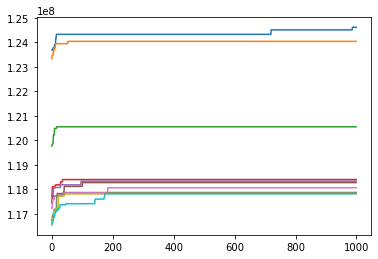

In [46]:
import matplotlib.pyplot as plt
import numpy as np
    
for i in range(len(y_plot_list)):
    plt.plot(x_plot_list, y_plot_list[i])

plt.show()

In [47]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 82430.91124773026 seconds ---


In [48]:
import pickle

with open('era-solution/era_output-2-40', 'wb') as fp:
    pickle.dump(result, fp)
with open('era-solution/era_xplot-2-40', 'wb') as fp:
    pickle.dump(x_plot_list, fp)
with open('era-solution/era_yplot-2-40', 'wb') as fp:
    pickle.dump(y_plot_list, fp)
with open('era-solution/era_splot-2-40', 'wb') as fp:
    pickle.dump(var_s_plot_list, fp)
with open('era-solution/era_aplot-2-40', 'wb') as fp:
    pickle.dump(var_a_plot_list, fp)   
with open('era-solution/era_bplot-2-40', 'wb') as fp:
    pickle.dump(var_b_plot_list, fp) 

In [49]:
with open('era-solution/era_output-2-40', 'rb') as fp:
    read_result = pickle.load(fp)
    
print(read_result)

[[0, 20, Timestamp('2020-11-20 16:06:59+0000', tz='UTC'), Timestamp('2020-11-21 05:40:59+0000', tz='UTC'), 47, 0.133], [1, 23, Timestamp('2020-11-20 16:08:35+0000', tz='UTC'), Timestamp('2020-11-21 05:29:37+0000', tz='UTC'), 47, 0.133], [2, 24, Timestamp('2020-11-20 16:13:20+0000', tz='UTC'), Timestamp('2020-11-21 05:09:18+0000', tz='UTC'), 47, 0.133], [3, 21, Timestamp('2020-11-20 16:44:59+0000', tz='UTC'), Timestamp('2020-11-21 05:14:59+0000', tz='UTC'), 47, 0.133], [4, 26, Timestamp('2020-11-20 17:48:48+0000', tz='UTC'), Timestamp('2020-11-21 03:40:12+0000', tz='UTC'), 49, 0.14], [5, 1, Timestamp('2020-11-20 17:54:12+0000', tz='UTC'), Timestamp('2020-11-21 00:57:39+0000', tz='UTC'), 60, 0.171], [6, 18, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 71, 0.171], [7, 16, Timestamp('2020-11-20 19:32:05+0000', tz='UTC'), Timestamp('2020-11-21 04:04:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 20:31:38+0000', tz='UTC'), 

In [50]:
with open('era-solution/era_yplot-2-40', 'rb') as fp:
    read_yplot = pickle.load(fp)
    
print(read_yplot)

[[123687005.81496182, 123687005.81496182, 123687005.81496182, 123687005.81496182, 123766551.60896182, 123766551.60896182, 123766551.60896182, 123766551.60896182, 123766551.60896182, 123884617.03896183, 123884617.03896183, 123884617.03896183, 123940081.60496181, 124147467.35596178, 124147467.35596178, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179, 124320997.35196179

In [51]:
with open('era-solution/era_output-2-40', 'rb') as fp:
    read_result = pickle.load(fp)
    print(countFitness(read_result))
    
# print(read_result)

[124610139.7779618, 3923, 19643136, 31]
